In [43]:
#Python Packages
import pandas as pd
import numpy as np
import xarray as xr
import glob as gb 
import csv
import itertools
from pathlib import Path
from pandas import *
import os.path
import matplotlib.pyplot as plt

In [44]:
#Load in functions from freelymoving ephys
import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/FreelyMovingEphys')
from utils.paths import find
from utils.time import open_time1
from utils.time import open_time
from utils.format_data import open_h5
from utils.format_data import open_ma_h5

#function to get correct frame in case there's lag in the acquisition
def find_first(item, vec):
    return np.argmin(np.abs(vec-item))

In [149]:
##Load Data
# Dictionary of columns in data frame
data_dict = {'date': [],
             'animal': [],
             'task': [],             
             'poke1_ts':[],
             'poke2_ts': [],
             #'spout1_ts': [],
             #'spout2_ts': [],
             'top1_ts': [],
             'poke1_t0':[],
             'poke2_t0': [],
             #'spout1_t0': [],
             #'spout2_t0': [],
             'top1_t0': []}
# List of dates for analysis
dates= ['090121','090221','090321','090621','090721','090821','090921','091321']
data_path = Path('~/Desktop/mike_bonsai/recordings/').expanduser()
all_paths = []
#Populate Data Dict with meta data and timestamps   
for date in dates:
    for ani in os.listdir(data_path / date): 
        for task in os.listdir(data_path / date/ ani):
            data_paths = list((data_path / date/ ani/ task).rglob('*.csv'))
            if data_paths != []:
                    data_dict['date'].append(data_paths[1].name.split('_')[0])
                    data_dict['animal'].append(data_paths[1].name.split('_')[1])
                    data_dict['task'].append(data_paths[1].name.split('_')[4])
            for ind, csv in enumerate(data_paths):
                data_dict[data_paths[ind].name.split('_')[5] +'_ts'].append(open_time(csv))
                data_dict[data_paths[ind].name.split('_')[5] +'_t0'].append(open_time(csv)[0])
df = pd.DataFrame(data_dict)


In [150]:
df

,date,animal,task,poke1_ts,poke2_ts,top1_ts,poke1_t0,poke2_t0,top1_t0
0,090121,G6CK3LT,oa,"[48355.092595, 48412.568396, 48456.161011, 484...","[48381.866137, 48429.924313, 48473.714265, 485...","[48348.106982, 48348.122931, 48348.139622, 483...",48355.092595,48381.866137,48348.106982
1,090121,G6CK3RT,oa,"[45231.295052, 45279.758771, 45308.023385, 454...","[45264.262374, 45285.223168, 45408.133593, 454...","[45073.345049, 45073.356364, 45073.373081, 450...",45231.295052,45264.262374,45073.345049
2,090221,G6CK3LT,oa,"[40091.950323, 40169.649497, 40293.092518, 403...","[40114.136166, 40270.604556, 40321.668428, 403...","[40085.622323, 40085.638668, 40085.655372, 400...",40091.950323,40114.136166,40085.622323
3,090221,G6CK3RT,oa,"[43553.127398, 43665.948185, 43829.538956, 439...","[43563.941184, 43817.655667, 43869.941158, 439...","[43449.226982, 43449.242585, 43449.259353, 434...",43553.127398,43563.941184,43449.226982
4,090321,G6CK3LT,oa,"[53443.819046, 53480.206771, 53517.618572, 535...","[53461.244851, 53502.134412, 53526.630848, 535...","[53441.319168, 53441.332096, 53441.348633, 534...",53443.819046,53461.244851,53441.319168
5,090321,G6CK3RT,oa,"[49950.593344, 49981.639577, 50070.878118, 501...","[49968.649702, 50004.042176, 50102.915328, 501...","[49880.648883, 49880.663769, 49880.680422, 498...",49950.593344,49968.649702,49880.648883
6,090621,G6CK3LT,oa,"[45912.974912, 45935.983936, 45949.62478, 4596...","[45924.182553, 45942.881945, 45955.695244, 459...","[45903.962457, 45903.978739, 45903.995366, 459...",45912.974912,45924.182553,45903.962457
7,090621,G6CK3RT,oa,"[47777.394316, 47843.215001, 47865.924147, 478...","[47823.191488, 47860.340902, 47872.973926, 478...","[47774.940876, 47774.955609, 47774.972275, 477...",47777.394316,47823.191488,47774.940876
8,090721,G6CK3LT,oa,"[56501.388723, 56513.120588, 56525.319654, 565...","[56507.422604, 56518.576857, 56529.210982, 565...","[56493.150937, 56493.165504, 56493.18222, 5649...",56501.388723,56507.422604,56493.150937
9,090721,G6CK3RT,oa,"[55078.283648, 55099.309964, 55125.174208, 551...","[55089.913113, 55110.656896, 55130.13888, 5516...","[55053.940748, 55053.962022, 55053.973849, 550...",55078.283648,55089.913113,55053.940748


In [151]:
#Align to 
df.poke1_ts = df.poke1_ts - df.top1_t0
df.poke2_ts = df.poke2_ts - df.top1_t0
df.top1_ts = df.top1_ts - df.top1_t0 
#df.spout1_ts = df.spout1_ts - df.top1_t0
#df.spout2_ts = df.spout2_ts - df.top1_t0

In [152]:
#Get all pokes_ts
pokes_ts = []
for ind, row in df.iterrows():
    x = row['poke1_ts'].astype(str).astype(float)
    y = row['poke2_ts'].astype(str).astype(float)
    z = list(itertools.chain(x,y)) 
    z = sorted(z)
    pokes_ts.append(z)
df['pokes_ts'] = pokes_ts

In [153]:
# Number of pokes 
pokes = []
for ind, row in df.iterrows():
    x = row['pokes_ts']
    x=len(x)
    pokes.append(x)
df['poke_num'] = pokes

In [154]:
# Time between pokes in sec
time_between_pokes = []
for ind, row in df.iterrows():
    g = row['pokes_ts']
    g = np.diff(g)
    #g = g[0::2]
    
    time_between_pokes.append(g)
df['time_between_pokes'] = time_between_pokes

In [155]:
#Get 'trials'
## add 
trial_ts = []
for ind, row in df.iterrows():
    x = row['pokes_ts']#.astype(str).astype(float)
    y = [x[i:i+2] for i in range(0, len(x), 2)]
    z =  [x[i+1:i+3] for i in range(0, len(x), 2)]
    t = sorted(y+z)
    trial_ts.append(t)
df['trial_ts']= trial_ts


In [156]:
#Get 'trials #'
trial_num = []
for ind, row in df.iterrows():
    x = row['trial_ts']#.astype(str).astype(float)
    y=len(x)
    trial_num.append(y)
df['trial_num']= trial_num 

In [174]:
# time
time = []
for ind, row in df.iterrows():
    x = row['top1_ts']
    y=len(x)
    y=y/60
    time.append(y)
df['time'] = time

In [175]:
# time/trials
avg_t_trial = []
for ind, row in df.iterrows():
    x = row['time']/row['trial_num']
    avg_t_trial.append(x)
df['avg_t_trial'] = avg_t_trial

In [190]:
# avg_trial_poke
avg_trial_poke = []
for ind, row in df.iterrows():
    x = np.mean(row['time_between_pokes'])
    avg_trial_poke.append(x)
df['avg_trial_poke'] = avg_trial_poke

In [259]:
animals =[]
for i, g in df.groupby('animal'):
    globals()['df_' + str(i)] =  g
    g =g.reset_index(drop=True, inplace=True)
    animals.append(i)
    


In [257]:
animals

['G6CK3LT', 'G6CK3RT']

In [260]:
df_G6CK3RT

,date,animal,task,poke1_ts,poke2_ts,top1_ts,poke1_t0,poke2_t0,top1_t0,pokes_ts,poke_num,time_between_pokes,trial_ts,trial_num,time,avg_t_trial,avg_trial_poke
0,090121,G6CK3RT,oa,"[157.9500029999981, 206.4137219999975, 234.678...","[190.9173249999949, 211.8781189999936, 334.788...","[0.0, 0.011314999996102415, 0.0280319999947096...",45231.295052,45264.262374,45073.345049,"[157.9500029999981, 190.9173249999949, 206.413...",70,"[32.967321999996784, 15.496397000002617, 5.464...","[[157.9500029999981, 190.9173249999949], [190....",70,3147.866667,44.969524,40.711742
1,090221,G6CK3RT,oa,"[103.90041599999677, 216.72120300000097, 380.3...","[114.71420200000284, 368.42868499999895, 420.7...","[0.0, 0.015602999999828171, 0.0323710000011487...",43553.127398,43563.941184,43449.226982,"[103.90041599999677, 114.71420200000284, 216.7...",83,"[10.813786000006075, 102.00700099999813, 151.7...","[[], [103.90041599999677, 114.71420200000284],...",84,3667.966667,43.666270,41.472470
2,090321,G6CK3RT,oa,"[69.94446099999914, 100.99069400000008, 190.22...","[88.00081900000077, 123.393293000001, 222.2664...","[0.0, 0.014885999997204635, 0.0315389999959734...",49950.593344,49968.649702,49880.648883,"[69.94446099999914, 88.00081900000077, 100.990...",113,"[18.056358000001637, 12.989874999999302, 22.40...","[[], [69.94446099999914, 88.00081900000077], [...",114,3478.950000,30.517105,28.589515
3,090621,G6CK3RT,oa,"[2.4534399999974994, 68.27412499999627, 90.983...","[48.25061199999618, 85.40002600000298, 98.0330...","[0.0, 0.014732999996340368, 0.0313989999995101...",47777.394316,47823.191488,47774.940876,"[2.4534399999974994, 48.25061199999618, 68.274...",108,"[45.79717199999868, 20.023513000000094, 17.125...","[[2.4534399999974994, 48.25061199999618], [48....",108,996.316667,9.225154,8.554397
4,090721,G6CK3RT,oa,"[24.342899999996007, 45.36921599999914, 71.233...","[35.972365000001446, 56.71614799999952, 76.198...","[0.0, 0.021273999998811632, 0.0331010000008973...",55078.283648,55089.913113,55053.940748,"[24.342899999996007, 35.972365000001446, 45.36...",124,"[11.629465000005439, 9.396850999997696, 11.346...","[[24.342899999996007, 35.972365000001446], [35...",124,1254.500000,10.116935,9.490292
5,090821,G6CK3RT,oa,"[1.0785919999980251, 25.66050600000017, 43.196...","[18.95087400000193, 31.14964499999769, 47.9934...","[0.0, 0.014810000000579748, 0.0314760000037495...",49238.296716,49256.168998,49237.218124,"[1.0785919999980251, 18.95087400000193, 25.660...",185,"[17.872282000003906, 6.709631999998237, 5.4891...","[[], [1.0785919999980251, 18.95087400000193], ...",186,1129.833333,6.074373,5.710635
6,090921,G6CK3RT,oa,"[1.2244100000025355, 17.49105899999995, 26.494...","[5.242573000003176, 21.742566000000807, 32.581...","[0.0, 0.012838000002375338, 0.0294530000028316...",44348.017216,44352.035379,44346.792806,"[1.2244100000025355, 5.242573000003176, 17.491...",126,"[4.018163000000641, 12.248485999996774, 4.2515...","[[1.2244100000025355, 5.242573000003176], [5.2...",126,1228.966667,9.753704,9.315373
7,090921,G6CK3RT,oa1,"[1.084006999997655, 33.535116999999445, 43.591...","[21.582220999996935, 38.71705600000132, 48.347...","[0.0, 0.014554000001226086, 0.0311809999984689...",55085.038528,55105.536742,55083.954521,"[1.084006999997655, 21.582220999996935, 33.535...",161,"[20.49821399999928, 11.95289600000251, 5.18193...","[[], [1.084006999997655, 21.582220999996935], ...",162,807.533333,4.984774,4.700818
8,091321,G6CK3RT,oa,"[1.1074050000024727, 35.676236999999674, 44.04...","[30.658086999996158, 39.670233999997436, 49.03...","[0.0, 0.015053000002808403, 0.0317439999998896...",39244.185574,39273.736256,39243.078169,"[1.1074050000024727, 30.658086999996158, 35.67...",149,"[29.550681999993685, 5.018150000003516, 3.9939...","[[], [1.1074050000024727, 30.658086999996158],...",150,1233.816667,8.225444,7.685760
9,091321,G6CK3RT,oa1,"[1.0939010000001872, 16.684415999996418, 31.27...","[13.03837499999645, 22.70178599999781, 35.7733...","[0.0, 0.013095000002067536, 0.029

In [191]:

data = df
#create unique list of names
by_animal = data.animal.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in by_animal}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][data.animal == key]

In [192]:
dflt = DataFrameDict['G6CK3LT']
dflt.reset_index(drop=True, inplace=True)
dfrt = DataFrameDict['G6CK3RT']
dfrt.reset_index(drop=True, inplace=True)

In [193]:
dflt

,date,animal,task,poke1_ts,poke2_ts,top1_ts,poke1_t0,poke2_t0,top1_t0,pokes_ts,poke_num,time_between_pokes,trial_ts,trial_num,time,avg_t_trial,avg_trial_poke
0,090121,G6CK3LT,oa,"[6.985613000004378, 64.46141400000488, 108.054...","[33.75915499999974, 81.81733100000565, 125.607...","[0.0, 0.01594900000054622, 0.03264000000490341...",48355.092595,48381.866137,48348.106982,"[6.985613000004378, 33.75915499999974, 64.4614...",47,"[26.77354199999536, 30.702259000005142, 17.355...","[[], [6.985613000004378, 33.75915499999974], [...",48,1227.866667,25.580556,26.483561
1,090221,G6CK3LT,oa,"[6.327999999994063, 84.02717399999528, 207.470...","[28.513842999993358, 184.98223299999518, 236.0...","[0.0, 0.016344999996363185, 0.0330489999978453...",40091.950323,40114.136166,40085.622323,"[6.327999999994063, 28.513842999993358, 84.027...",118,"[22.185842999999295, 55.513331000001926, 100.9...","[[6.327999999994063, 28.513842999993358], [28....",118,3167.716667,26.845056,26.312017
2,090321,G6CK3LT,oa,"[2.4998779999950784, 38.88760299999558, 76.299...","[19.9256830000013, 60.81524399999762, 85.31167...","[0.0, 0.012927999996463768, 0.0294649999996181...",53443.819046,53461.244851,53441.319168,"[2.4998779999950784, 19.9256830000013, 38.8876...",142,"[17.42580500000622, 18.96191999999428, 21.9276...","[[2.4998779999950784, 19.9256830000013], [19.9...",142,3173.733333,22.350235,21.309798
3,090621,G6CK3LT,oa,"[9.012454999996407, 32.02147899999545, 45.6623...","[20.220095999997284, 38.919487999999546, 51.73...","[0.0, 0.016281999996863306, 0.0329090000013820...",45912.974912,45924.182553,45903.962457,"[9.012454999996407, 20.220095999997284, 32.021...",137,"[11.207641000000876, 11.801382999998168, 6.898...","[[], [9.012454999996407, 20.220095999997284], ...",138,1750.383333,12.683937,12.291998
4,090721,G6CK3LT,oa,"[8.237785999997868, 19.96965099999943, 32.1687...","[14.271667000000889, 25.425920000001497, 36.06...","[0.0, 0.014566999998351093, 0.0312830000038957...",56501.388723,56507.422604,56493.150937,"[8.237785999997868, 14.271667000000889, 19.969...",152,"[6.033881000003021, 5.6979839999985415, 5.4562...","[[8.237785999997868, 14.271667000000889], [14....",152,968.616667,6.372478,6.357773
5,090821,G6CK3LT,oa,"[1.0935939999981201, 25.23863100000017, 35.657...","[6.582515000001877, 30.152602000001934, 39.500...","[0.0, 0.010496000002603978, 0.0271110000030603...",47915.215539,47920.704460,47914.121945,"[1.0935939999981201, 6.582515000001877, 25.238...",177,"[5.4889210000037565, 18.656115999998292, 4.913...","[[], [1.0935939999981201, 6.582515000001877], ...",178,1196.983333,6.724625,6.119750
6,090921,G6CK3LT,oa,"[0.7165690000038012, 34.3494520000022, 45.0162...","[25.28428800000256, 40.338252000001376, 51.947...","[0.0, 0.0032250000003841706, 0.003608999999414...",45761.132633,45785.700352,45760.416064,"[0.7165690000038012, 25.28428800000256, 34.349...",128,"[24.56771899999876, 9.06516399999964, 5.988799...","[[0.7165690000038012, 25.28428800000256], [25....",128,743.366667,5.807552,5.654530
7,090921,G6CK3LT,oa1,"[1.1686269999991055, 27.868850999999268, 49.99...","[12.048869999998715, 36.13521899999614, 56.485...","[0.0, 0.0038520000016433187, 0.005643999997118...",53656.865779,53667.746022,53655.697152,"[1.1686269999991055, 12.048869999998715, 27.86...",175,"[10.88024299999961, 15.819981000000553, 8.2663...","[[], [1.1686269999991055, 12.048869999998715],...",176,1307.183333,7.427178,7.275080
8,091321,G6CK3LT,oa,"[1.079026999999769, 16.432128000000375, 35.156...","[9.709912999998778, 28.71687699999893, 39.7236...","[0.0, 0.011839999999210704, 0.0285819999990053...",40616.381606,40625.012492,40615.302579,"[1.079026999999769, 9.709912999998778, 16.4321...",169,"[8.630885999999009, 6.722215000001597, 12.2847...","[[], [1.079026999999769, 9.709912999998778], [...",170,1015.200000,5.971765,5.691991
9,091321,G6CK3LT,oa1,"[1.1045499999963795, 57.18764799999917, 83.583...","[48.638349000000744, 72.38488299999881, 91.789...","[0.0, 0.016332999999576714, 0.

In [194]:
dfrt

,date,animal,task,poke1_ts,poke2_ts,top1_ts,poke1_t0,poke2_t0,top1_t0,pokes_ts,poke_num,time_between_pokes,trial_ts,trial_num,time,avg_t_trial,avg_trial_poke
0,090121,G6CK3RT,oa,"[157.9500029999981, 206.4137219999975, 234.678...","[190.9173249999949, 211.8781189999936, 334.788...","[0.0, 0.011314999996102415, 0.0280319999947096...",45231.295052,45264.262374,45073.345049,"[157.9500029999981, 190.9173249999949, 206.413...",70,"[32.967321999996784, 15.496397000002617, 5.464...","[[157.9500029999981, 190.9173249999949], [190....",70,3147.866667,44.969524,40.711742
1,090221,G6CK3RT,oa,"[103.90041599999677, 216.72120300000097, 380.3...","[114.71420200000284, 368.42868499999895, 420.7...","[0.0, 0.015602999999828171, 0.0323710000011487...",43553.127398,43563.941184,43449.226982,"[103.90041599999677, 114.71420200000284, 216.7...",83,"[10.813786000006075, 102.00700099999813, 151.7...","[[], [103.90041599999677, 114.71420200000284],...",84,3667.966667,43.666270,41.472470
2,090321,G6CK3RT,oa,"[69.94446099999914, 100.99069400000008, 190.22...","[88.00081900000077, 123.393293000001, 222.2664...","[0.0, 0.014885999997204635, 0.0315389999959734...",49950.593344,49968.649702,49880.648883,"[69.94446099999914, 88.00081900000077, 100.990...",113,"[18.056358000001637, 12.989874999999302, 22.40...","[[], [69.94446099999914, 88.00081900000077], [...",114,3478.950000,30.517105,28.589515
3,090621,G6CK3RT,oa,"[2.4534399999974994, 68.27412499999627, 90.983...","[48.25061199999618, 85.40002600000298, 98.0330...","[0.0, 0.014732999996340368, 0.0313989999995101...",47777.394316,47823.191488,47774.940876,"[2.4534399999974994, 48.25061199999618, 68.274...",108,"[45.79717199999868, 20.023513000000094, 17.125...","[[2.4534399999974994, 48.25061199999618], [48....",108,996.316667,9.225154,8.554397
4,090721,G6CK3RT,oa,"[24.342899999996007, 45.36921599999914, 71.233...","[35.972365000001446, 56.71614799999952, 76.198...","[0.0, 0.021273999998811632, 0.0331010000008973...",55078.283648,55089.913113,55053.940748,"[24.342899999996007, 35.972365000001446, 45.36...",124,"[11.629465000005439, 9.396850999997696, 11.346...","[[24.342899999996007, 35.972365000001446], [35...",124,1254.500000,10.116935,9.490292
5,090821,G6CK3RT,oa,"[1.0785919999980251, 25.66050600000017, 43.196...","[18.95087400000193, 31.14964499999769, 47.9934...","[0.0, 0.014810000000579748, 0.0314760000037495...",49238.296716,49256.168998,49237.218124,"[1.0785919999980251, 18.95087400000193, 25.660...",185,"[17.872282000003906, 6.709631999998237, 5.4891...","[[], [1.0785919999980251, 18.95087400000193], ...",186,1129.833333,6.074373,5.710635
6,090921,G6CK3RT,oa,"[1.2244100000025355, 17.49105899999995, 26.494...","[5.242573000003176, 21.742566000000807, 32.581...","[0.0, 0.012838000002375338, 0.0294530000028316...",44348.017216,44352.035379,44346.792806,"[1.2244100000025355, 5.242573000003176, 17.491...",126,"[4.018163000000641, 12.248485999996774, 4.2515...","[[1.2244100000025355, 5.242573000003176], [5.2...",126,1228.966667,9.753704,9.315373
7,090921,G6CK3RT,oa1,"[1.084006999997655, 33.535116999999445, 43.591...","[21.582220999996935, 38.71705600000132, 48.347...","[0.0, 0.014554000001226086, 0.0311809999984689...",55085.038528,55105.536742,55083.954521,"[1.084006999997655, 21.582220999996935, 33.535...",161,"[20.49821399999928, 11.95289600000251, 5.18193...","[[], [1.084006999997655, 21.582220999996935], ...",162,807.533333,4.984774,4.700818
8,091321,G6CK3RT,oa,"[1.1074050000024727, 35.676236999999674, 44.04...","[30.658086999996158, 39.670233999997436, 49.03...","[0.0, 0.015053000002808403, 0.0317439999998896...",39244.185574,39273.736256,39243.078169,"[1.1074050000024727, 30.658086999996158, 35.67...",149,"[29.550681999993685, 5.018150000003516, 3.9939...","[[], [1.1074050000024727, 30.658086999996158],...",150,1233.816667,8.225444,7.685760
9,091321,G6CK3RT,oa1,"[1.0939010000001872, 16.684415999996418, 31.27...","[13.03837499999645, 22.70178599999781, 35.7733...","[0.0, 0.013095000002067536, 0.029

In [195]:
df

,date,animal,task,poke1_ts,poke2_ts,top1_ts,poke1_t0,poke2_t0,top1_t0,pokes_ts,poke_num,time_between_pokes,trial_ts,trial_num,time,avg_t_trial,avg_trial_poke
0,090121,G6CK3LT,oa,"[6.985613000004378, 64.46141400000488, 108.054...","[33.75915499999974, 81.81733100000565, 125.607...","[0.0, 0.01594900000054622, 0.03264000000490341...",48355.092595,48381.866137,48348.106982,"[6.985613000004378, 33.75915499999974, 64.4614...",47,"[26.77354199999536, 30.702259000005142, 17.355...","[[], [6.985613000004378, 33.75915499999974], [...",48,1227.866667,25.580556,26.483561
1,090121,G6CK3RT,oa,"[157.9500029999981, 206.4137219999975, 234.678...","[190.9173249999949, 211.8781189999936, 334.788...","[0.0, 0.011314999996102415, 0.0280319999947096...",45231.295052,45264.262374,45073.345049,"[157.9500029999981, 190.9173249999949, 206.413...",70,"[32.967321999996784, 15.496397000002617, 5.464...","[[157.9500029999981, 190.9173249999949], [190....",70,3147.866667,44.969524,40.711742
2,090221,G6CK3LT,oa,"[6.327999999994063, 84.02717399999528, 207.470...","[28.513842999993358, 184.98223299999518, 236.0...","[0.0, 0.016344999996363185, 0.0330489999978453...",40091.950323,40114.136166,40085.622323,"[6.327999999994063, 28.513842999993358, 84.027...",118,"[22.185842999999295, 55.513331000001926, 100.9...","[[6.327999999994063, 28.513842999993358], [28....",118,3167.716667,26.845056,26.312017
3,090221,G6CK3RT,oa,"[103.90041599999677, 216.72120300000097, 380.3...","[114.71420200000284, 368.42868499999895, 420.7...","[0.0, 0.015602999999828171, 0.0323710000011487...",43553.127398,43563.941184,43449.226982,"[103.90041599999677, 114.71420200000284, 216.7...",83,"[10.813786000006075, 102.00700099999813, 151.7...","[[], [103.90041599999677, 114.71420200000284],...",84,3667.966667,43.666270,41.472470
4,090321,G6CK3LT,oa,"[2.4998779999950784, 38.88760299999558, 76.299...","[19.9256830000013, 60.81524399999762, 85.31167...","[0.0, 0.012927999996463768, 0.0294649999996181...",53443.819046,53461.244851,53441.319168,"[2.4998779999950784, 19.9256830000013, 38.8876...",142,"[17.42580500000622, 18.96191999999428, 21.9276...","[[2.4998779999950784, 19.9256830000013], [19.9...",142,3173.733333,22.350235,21.309798
5,090321,G6CK3RT,oa,"[69.94446099999914, 100.99069400000008, 190.22...","[88.00081900000077, 123.393293000001, 222.2664...","[0.0, 0.014885999997204635, 0.0315389999959734...",49950.593344,49968.649702,49880.648883,"[69.94446099999914, 88.00081900000077, 100.990...",113,"[18.056358000001637, 12.989874999999302, 22.40...","[[], [69.94446099999914, 88.00081900000077], [...",114,3478.950000,30.517105,28.589515
6,090621,G6CK3LT,oa,"[9.012454999996407, 32.02147899999545, 45.6623...","[20.220095999997284, 38.919487999999546, 51.73...","[0.0, 0.016281999996863306, 0.0329090000013820...",45912.974912,45924.182553,45903.962457,"[9.012454999996407, 20.220095999997284, 32.021...",137,"[11.207641000000876, 11.801382999998168, 6.898...","[[], [9.012454999996407, 20.220095999997284], ...",138,1750.383333,12.683937,12.291998
7,090621,G6CK3RT,oa,"[2.4534399999974994, 68.27412499999627, 90.983...","[48.25061199999618, 85.40002600000298, 98.0330...","[0.0, 0.014732999996340368, 0.0313989999995101...",47777.394316,47823.191488,47774.940876,"[2.4534399999974994, 48.25061199999618, 68.274...",108,"[45.79717199999868, 20.023513000000094, 17.125...","[[2.4534399999974994, 48.25061199999618], [48....",108,996.316667,9.225154,8.554397
8,090721,G6CK3LT,oa,"[8.237785999997868, 19.96965099999943, 32.1687...","[14.271667000000889, 25.425920000001497, 36.06...","[0.0, 0.014566999998351093, 0.0312830000038957...",56501.388723,56507.422604,56493.150937,"[8.237785999997868, 14.271667000000889, 19.969...",152,"[6.033881000003021, 5.6979839999985415, 5.4562...","[[8.237785999997868, 14.271667000000889], [14....",152,968.616667,6.372478,6.357773
9,090721,G6CK3RT,oa,"[24.342899999996007, 45.36921599999914, 71.233...","[35.972365000001446, 56.71614799999952, 76.198...","[0.0, 0.021273999998811632, 0.

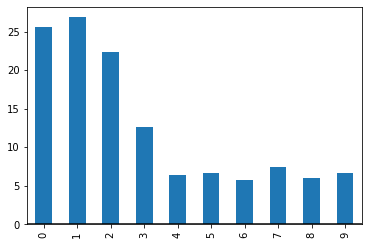

In [200]:
plt.figure()
dflt.avg_t_trial.plot.bar(); plt.axhline(0, color='k')

In [196]:
dfrt.avg_t_trial.plot.bar()

In [237]:
df1 = pd.concat([dflt['avg_t_trial'],dfrt['avg_t_trial'],dflt['trial_num'],dfrt['trial_num']],axis=1, keys=['lt_t_trial', 'rt_t_trial','lt_num_trial','rt_num_trial'])

df1['avg_t'] = df1[['lt_t_trial', 'rt_t_trial']].mean(axis=1)

df1['avg_num'] = df1[['lt_num_trial', 'rt_num_trial']].mean(axis=1)

In [238]:
df1

,lt_t_trial,rt_t_trial,lt_num_trial,rt_num_trial,avg_t,avg_num
0,25.580556,44.969524,48,70,35.275040,59.0
1,26.845056,43.666270,118,84,35.255663,101.0
2,22.350235,30.517105,142,114,26.433670,128.0
3,12.683937,9.225154,138,108,10.954546,123.0
4,6.372478,10.116935,152,124,8.244707,138.0
5,6.724625,6.074373,178,186,6.399499,182.0
6,5.807552,9.753704,128,126,7.780628,127.0
7,7.427178,4.984774,176,162,6.205976,169.0
8,5.971765,8.225444,170,150,7.098605,160.0
9,6.661894,5.620406,220,156,6.141150,188.0


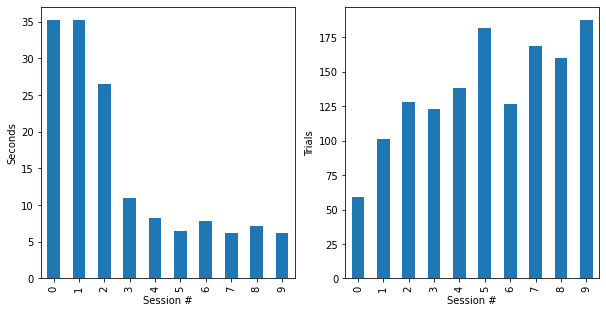

In [250]:

figure, axes = plt.subplots(1, 2, figsize= (10,5))
axes[0].set(xlabel="Session #", ylabel="Seconds")
axes[1].set(xlabel="Session #", ylabel="Trials")
df1['avg_t'].plot(ax=axes[0],kind='bar')
df1['avg_num'].plot(ax=axes[1],kind='bar')

plt.savefig('Avg performance')


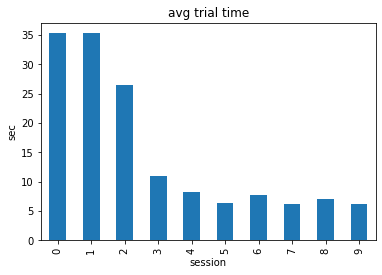

In [211]:
plt.figure()
plt.ylabel('sec')
plt.xlabel('session')
plt.title('avg trial time')
df1['avg'].plot.bar()
plt.savefig('avg trial time')


In [209]:
df2 = pd.concat([dflt['trial_num'],dfrt['trial_num']],axis=1, keys=['lt', 'rt'])
df2['avg'] = df2[['lt', 'rt']].mean(axis=1)

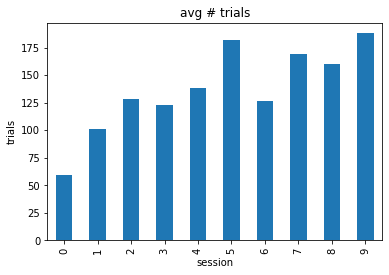

In [213]:
plt.figure()
plt.ylabel('trials')
plt.xlabel('session')
plt.title('avg # trials')
df2['avg'].plot.bar()
plt.savefig('avg trial number')